## Análise Exploratória com dados do IMDB
## Análise 1

In [41]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns

In [2]:
con = sqlite3.connect('imdb.db')

In [3]:
instrucao = "SELECT NAME AS 'Table_Name' FROM sqlite_master WHERE type = 'table'"

In [4]:
tabelas = pd.read_sql_query(instrucao, con)

In [5]:
tabelas

,Table_Name
0,people
1,titles
2,akas
3,crew
4,episodes
5,ratings


In [6]:
tabelas = tabelas['Table_Name'].values.tolist()

In [7]:
for tabela in tabelas:
    consulta = "PRAGMA TABLE_INFO({})".format(tabela)
    each_tabela = pd.read_sql_query(consulta, con)
    print(f'Esquema da tabela: {tabela}\n')
    display(each_tabela)
    print('\n\n')
    

Esquema da tabela: people



,cid,name,type,notnull,dflt_value,pk
0,0,person_id,VARCHAR,0,None,1
1,1,name,VARCHAR,0,None,0
2,2,born,INTEGER,0,None,0
3,3,died,INTEGER,0,None,0





Esquema da tabela: titles



,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,type,VARCHAR,0,None,0
2,2,primary_title,VARCHAR,0,None,0
3,3,original_title,VARCHAR,0,None,0
4,4,is_adult,INTEGER,0,None,0
5,5,premiered,INTEGER,0,None,0
6,6,ended,INTEGER,0,None,0
7,7,runtime_minutes,INTEGER,0,None,0
8,8,genres,VARCHAR,0,None,0





Esquema da tabela: akas



,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,title,VARCHAR,0,None,0
2,2,region,VARCHAR,0,None,0
3,3,language,VARCHAR,0,None,0
4,4,types,VARCHAR,0,None,0
5,5,attributes,VARCHAR,0,None,0
6,6,is_original_title,INTEGER,0,None,0





Esquema da tabela: crew



,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,0
1,1,person_id,VARCHAR,0,None,0
2,2,category,VARCHAR,0,None,0
3,3,job,VARCHAR,0,None,0
4,4,characters,VARCHAR,0,None,0





Esquema da tabela: episodes



,cid,name,type,notnull,dflt_value,pk
0,0,episode_title_id,INTEGER,0,None,0
1,1,show_title_id,INTEGER,0,None,0
2,2,season_number,INTEGER,0,None,0
3,3,eposide_number,INTEGER,0,None,0





Esquema da tabela: ratings



,cid,name,type,notnull,dflt_value,pk
0,0,title_id,VARCHAR,0,None,1
1,1,rating,INTEGER,0,None,0
2,2,votes,INTEGER,0,None,0


<H1>Qual a média de notas por categoria no Brasil?</H1>

In [8]:
consulta= '''SELECT region, type, AVG(rating) AS nota_media FROM akas
            INNER JOIN ratings ON ratings.title_id = akas.title_id
            INNER JOIN titles ON titles.title_id = ratings.title_id
            WHERE region = "BR" GROUP BY type ORDER BY nota_media DESC '''

In [9]:
resultado1 = pd.read_sql_query(consulta, con)
display(resultado1)

,region,type,nota_media
0,BR,tvEpisode,8.019591
1,BR,videoGame,7.635764
2,BR,tvMiniSeries,7.304016
3,BR,tvShort,7.205333
4,BR,tvSeries,7.119598
5,BR,tvSpecial,6.971069
6,BR,short,6.895934
7,BR,movie,6.167699
8,BR,tvMovie,5.971660
9,BR,video,5.927727


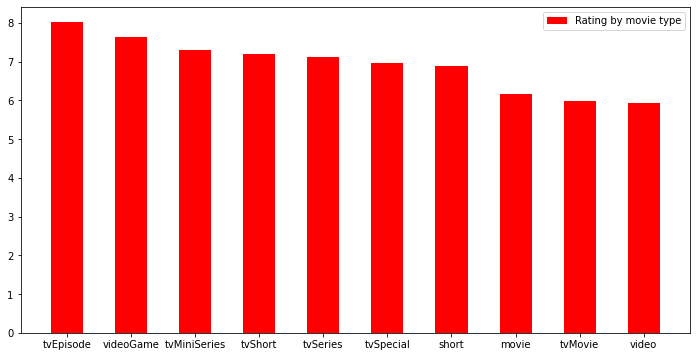

In [47]:

plt.figure(figsize = (12,6))
titulo = "Ratings"
plt.bar(x=resultado1['type'].values, height=resultado1['nota_media'].values,
        width = 0.5, align='center', color='r', label= 'Rating by movie type')
plt.legend()
plt.show()

<H1>Quais São as Categorias de Filmes Mais Comuns no IMDB?</H1>

In [11]:
consulta2 = '''SELECT type, COUNT(type) as qtd_filmes FROM titles GROUP BY type'''

In [12]:
resultado2 = pd.read_sql_query(consulta2, con)

In [13]:
resultado2['type'].count()

12

In [14]:
display(resultado2)

,type,qtd_filmes
0,movie,590360
1,radioEpisode,1
2,short,834885
3,tvEpisode,6122373
4,tvMiniSeries,40095
5,tvMovie,133254
6,tvPilot,2
7,tvSeries,216451
8,tvShort,10328
9,tvSpecial,34398


In [15]:
resultado2['%qtd'] = (resultado2['qtd_filmes']/resultado2['qtd_filmes'].sum()) * 100

In [16]:
display(resultado2)

,type,qtd_filmes,%qtd
0,movie,590360,7.082080
1,radioEpisode,1,0.000012
2,short,834885,10.015452
3,tvEpisode,6122373,73.445247
4,tvMiniSeries,40095,0.480988
5,tvMovie,133254,1.598542
6,tvPilot,2,0.000024
7,tvSeries,216451,2.596591
8,tvShort,10328,0.123897
9,tvSpecial,34398,0.412645


In [17]:
meu_teste = [round(resultado2['%qtd'][linha], 2) for linha in resultado2.index]
#meu_teste = round(resultado2['%qtd'][2], 2)

In [18]:
resultado2['%qtd'] = meu_teste

In [19]:
resultado2

,type,qtd_filmes,%qtd
0,movie,590360,7.08
1,radioEpisode,1,0.00
2,short,834885,10.02
3,tvEpisode,6122373,73.45
4,tvMiniSeries,40095,0.48
5,tvMovie,133254,1.60
6,tvPilot,2,0.00
7,tvSeries,216451,2.60
8,tvShort,10328,0.12
9,tvSpecial,34398,0.41


In [20]:
temp = resultado2[resultado2['%qtd']<5]
display(temp)

,type,qtd_filmes,%qtd
1,radioEpisode,1,0.00
4,tvMiniSeries,40095,0.48
5,tvMovie,133254,1.60
6,tvPilot,2,0.00
7,tvSeries,216451,2.60
8,tvShort,10328,0.12
9,tvSpecial,34398,0.41
10,video,324383,3.89
11,videoGame,29439,0.35


In [21]:
outros = {}
outros['type'] = 'Others'
outros['qtd_filmes'] = temp['qtd_filmes'].values.sum().tolist()
outros['%qtd'] = temp['%qtd'].values.sum().tolist()

In [22]:
temp = resultado2[resultado2['%qtd']>5]

In [23]:
temp = temp.append(outros, ignore_index=True)

In [24]:
temp = temp.sort_values(by='%qtd', ascending= False)

In [25]:
display(temp)

,type,qtd_filmes,%qtd
2,tvEpisode,6122373,73.45
1,short,834885,10.02
3,Others,788351,9.45
0,movie,590360,7.08


In [26]:
labels = [str(temp['type'][linha]) + ' ' + str(round(temp['%qtd'][linha], 2)) + '%' for linha in temp.index]

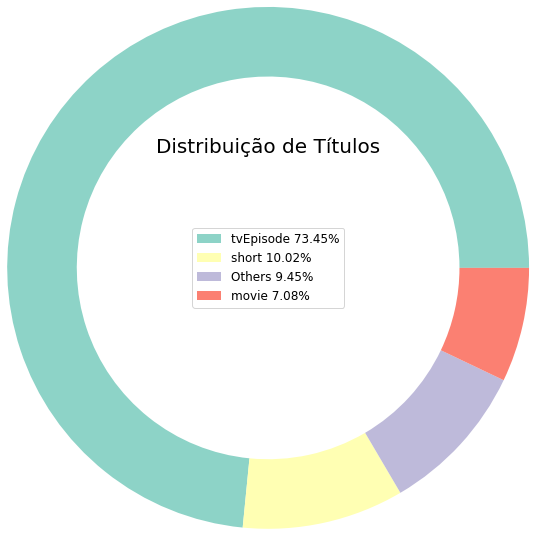

In [27]:
# Plot

# Mapa de cores
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cs = cm.Set3(np.arange(100))

# Cria a figura
f = plt.figure()

# Pie Plot
plt.pie(temp['qtd_filmes'], labeldistance = 1, radius = 3, colors = cs, wedgeprops = dict(width = 0.8))
plt.legend(labels = labels, loc = 'center', prop = {'size':12})
plt.title("Distribuição de Títulos", loc = 'Center', fontdict = {'fontsize':20,'fontweight':20})
plt.show()

<H2>Qual a Mediana de Avaliação dos Filmes Em Relação ao Ano de Estréia?</H2>

In [28]:
consulta3 = '''SELECT type, rating, premiered from ratings 
                INNER JOIN titles on titles.title_id = ratings.title_id 
                WHERE type='movie' and premiered<= 2022 ORDER BY premiered'''

In [29]:
resultado3 = pd.read_sql_query(consulta3, con)

In [30]:
resultado3

,type,rating,premiered
0,movie,6.4,1896
1,movie,4.4,1897
2,movie,3.9,1899
3,movie,3.7,1899
4,movie,6.0,1900
...,...,...,...
269494,movie,4.8,2021
269495,movie,9.1,2021
269496,movie,5.6,2021
269497,movie,5.9,2021


In [33]:
ratings = []
for year in set(resultado3['premiered']):
    ratings.append(np.median(resultado3[resultado3['premiered'] == year]['rating']))

In [36]:
anos = list(set(resultado3['premiered']))

In [37]:
anos[0:5]

[1896, 1897, 1899, 1900, 1901]

In [39]:
ratings[0:5]

[6.4, 4.4, 3.8, 5.9, 4.6]

Text(0, 0.5, '\n Ano de Lançamento \n')

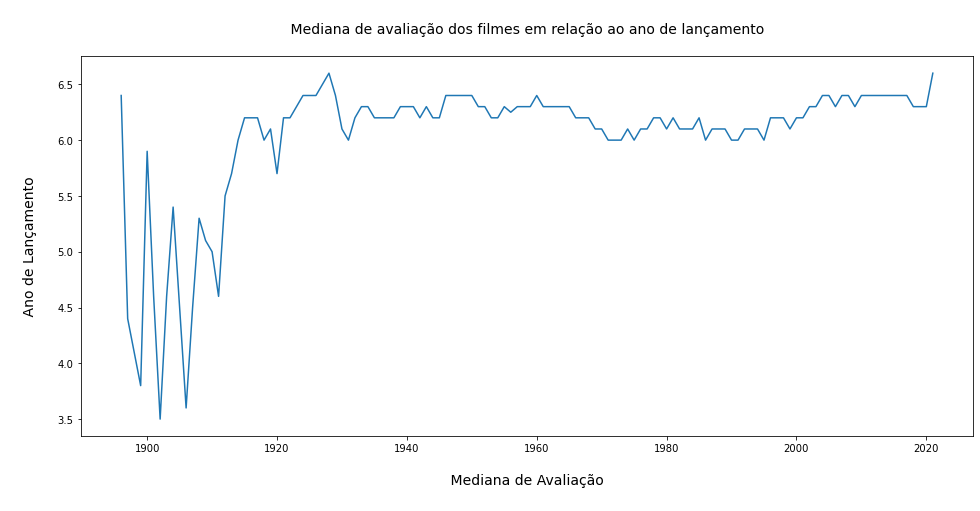

In [46]:
fontdict={'fontsize':14}
plt.figure(figsize=(16,7))
ax = sns.lineplot(x=anos, y=ratings)
ax.set_title('\n Mediana de avaliação dos filmes em relação ao ano de lançamento \n', fontdict=fontdict)
ax.set_xlabel('\n Mediana de Avaliação \n', fontdict=fontdict)
ax.set_ylabel('\n Ano de Lançamento \n', fontdict=fontdict)